In [26]:
import sys
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)

- Created a class for Hierarchical Clustering.
- The routine hc.linkages(X, linkage type) takes the data and provides linkage matrix.
- The routine hc.dendogram(Z) takes the linkage matrix and plots a dendogram.

In [27]:
class HC:
    def __init__(self):
        print()

    def linkages(self, data, linkage_type):
        matrix = linkage(data, linkage_type)
        return matrix

    def dendrogram(self, matrix):
        plt.figure(figsize=(10, 6))
        dendrogram(matrix)
        plt.show()

- Dropped the first column as it corresponds to id and does not add any value to the data.
- Encoded the Genre column to have binary data instead of categorial data.
- Applied Standardization on the other columns except the Genre.
- Used all the linkage metrics i.e, single, complete, average, weighted and ward.
- Used some subset of the columns and the entire dataset as the different features.
- Obtained the linkage matrices and plotted the dendrogram for each of the combinations.

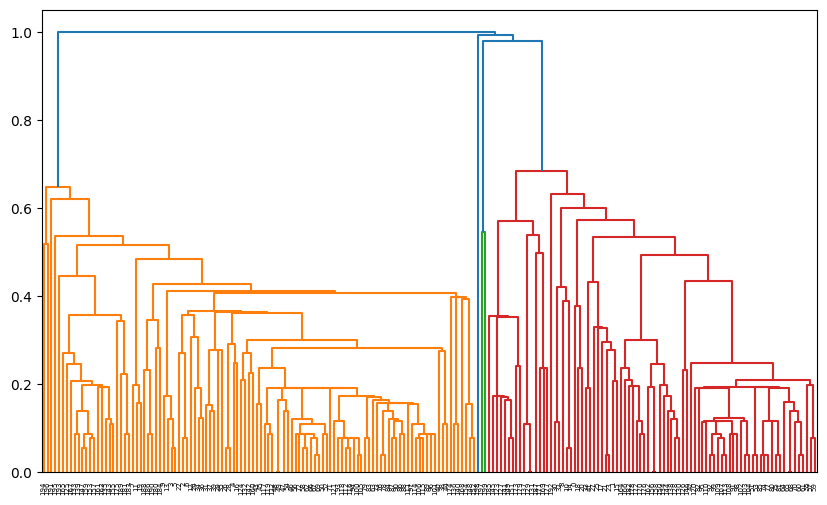

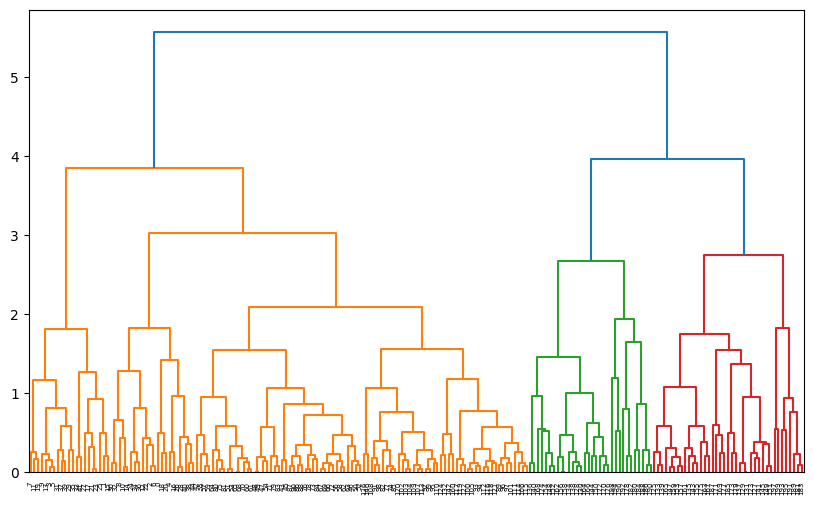

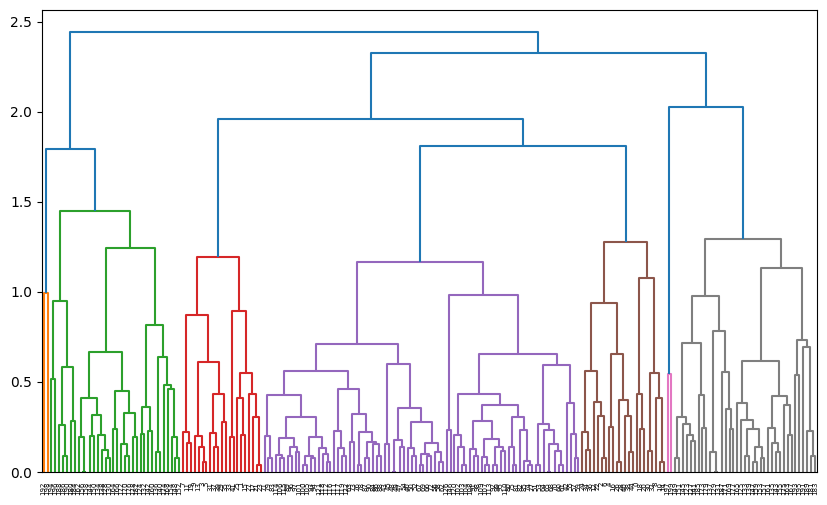

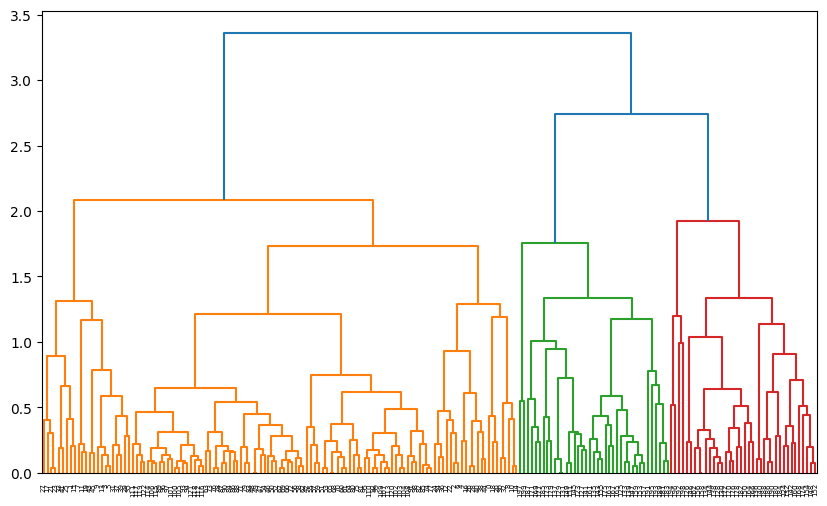

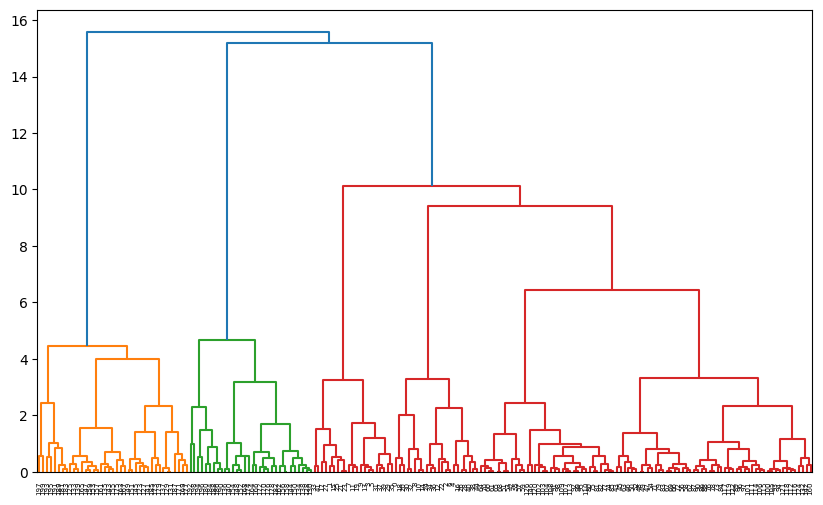

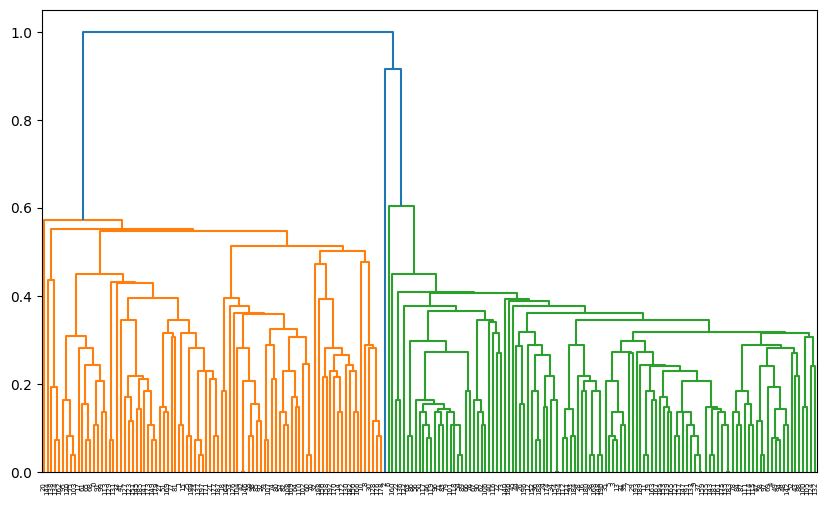

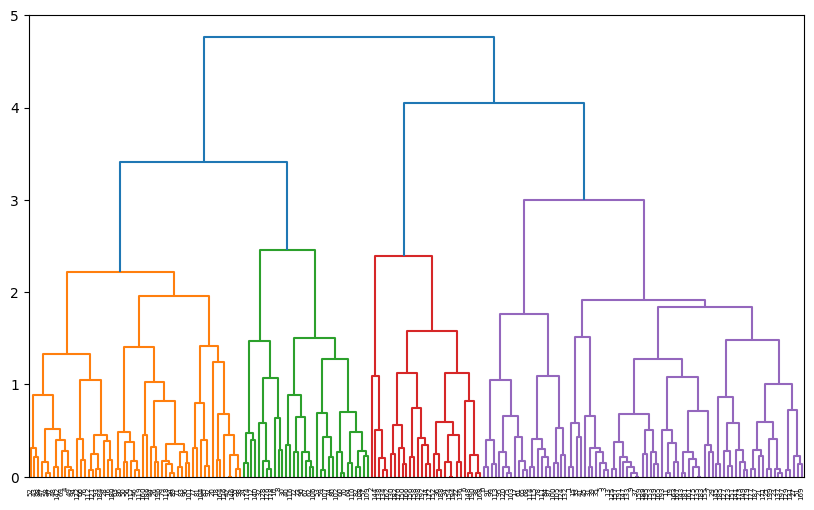

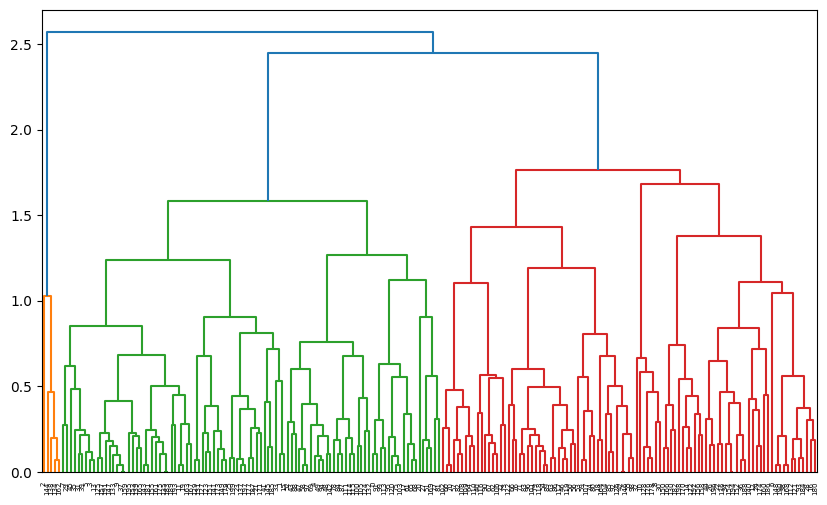

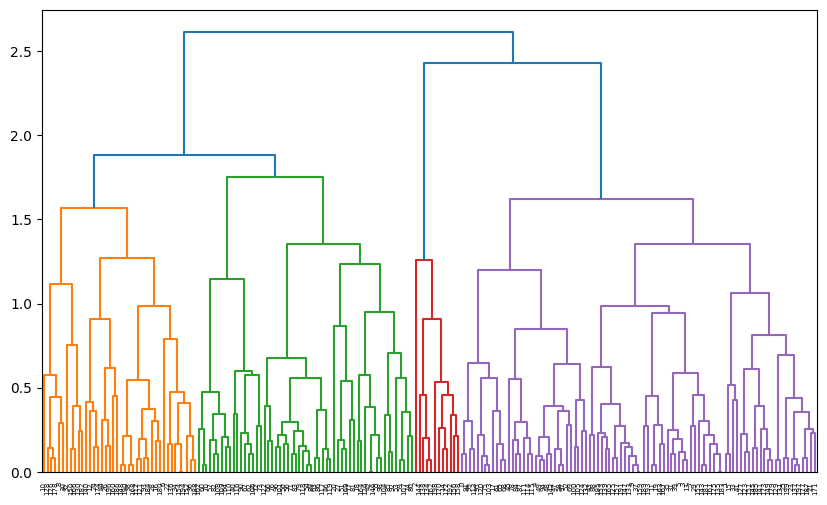

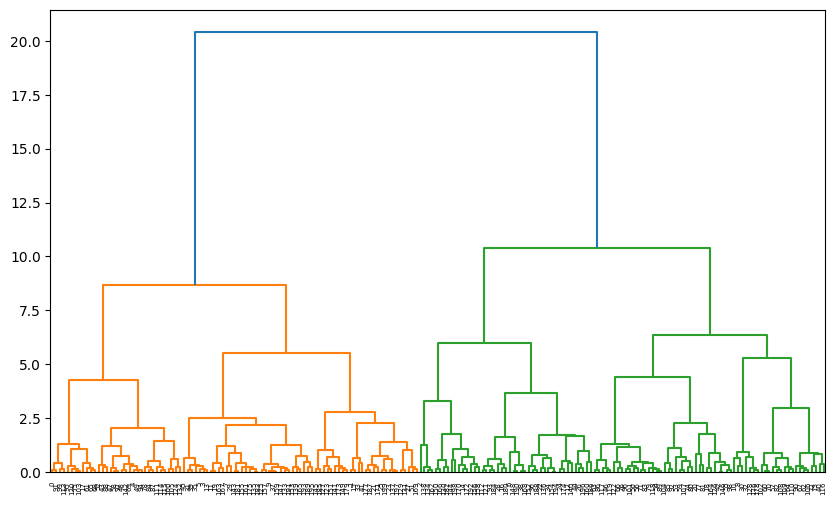

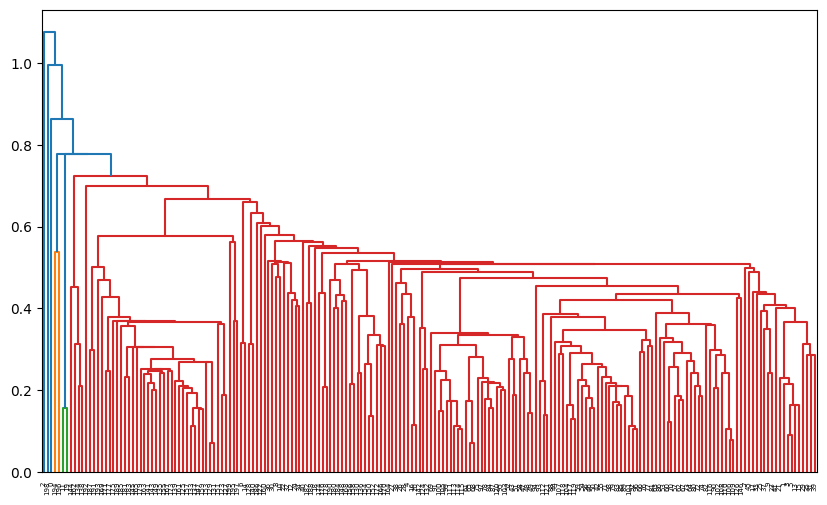

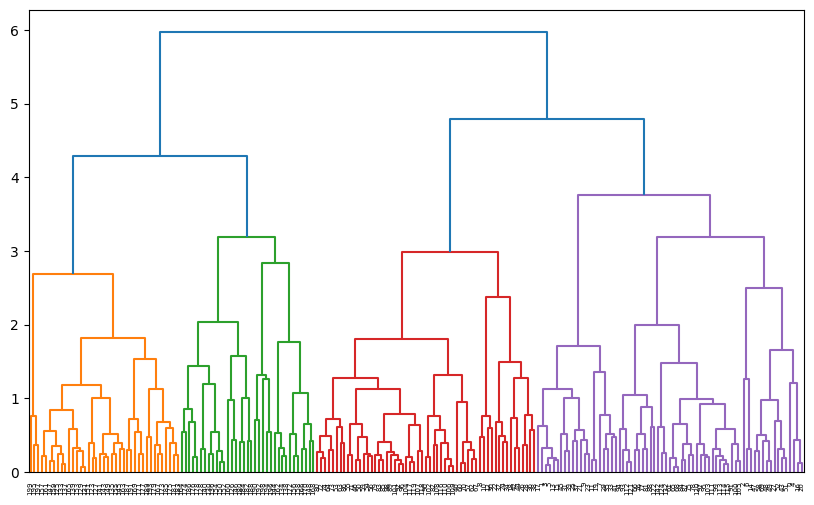

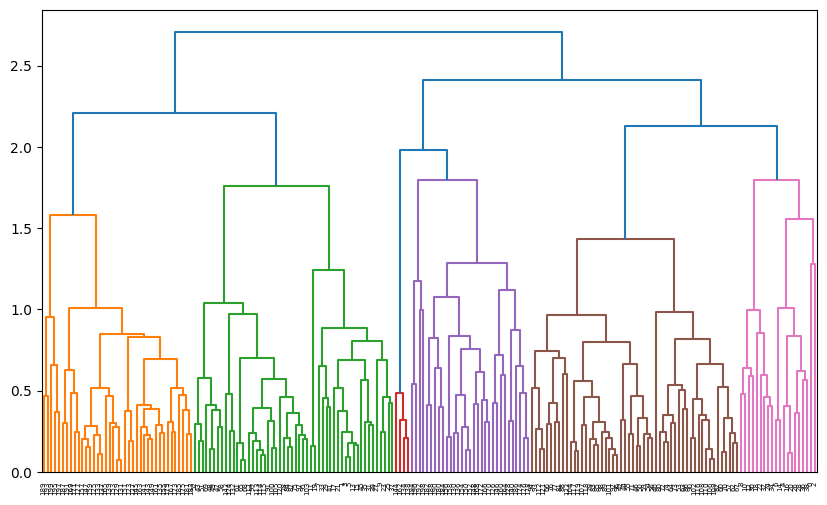

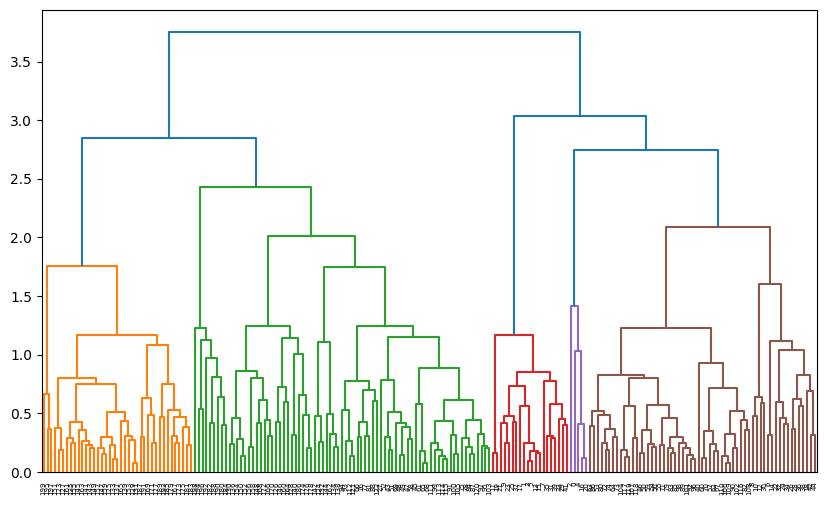

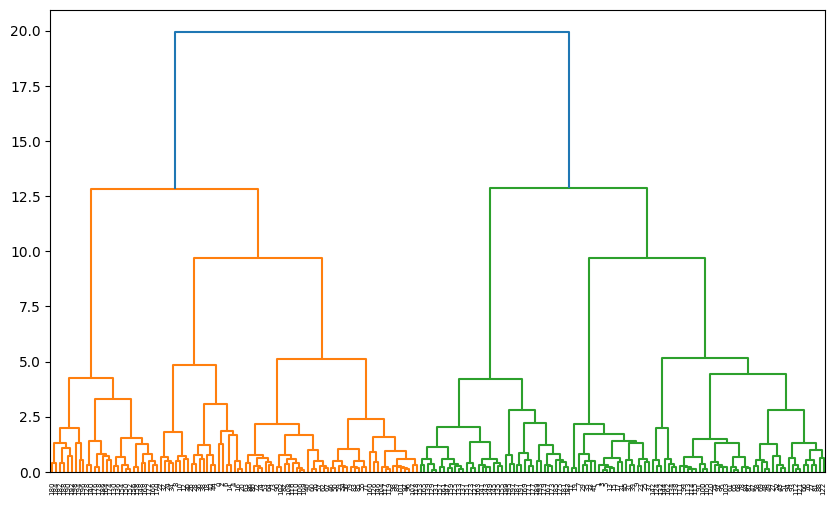

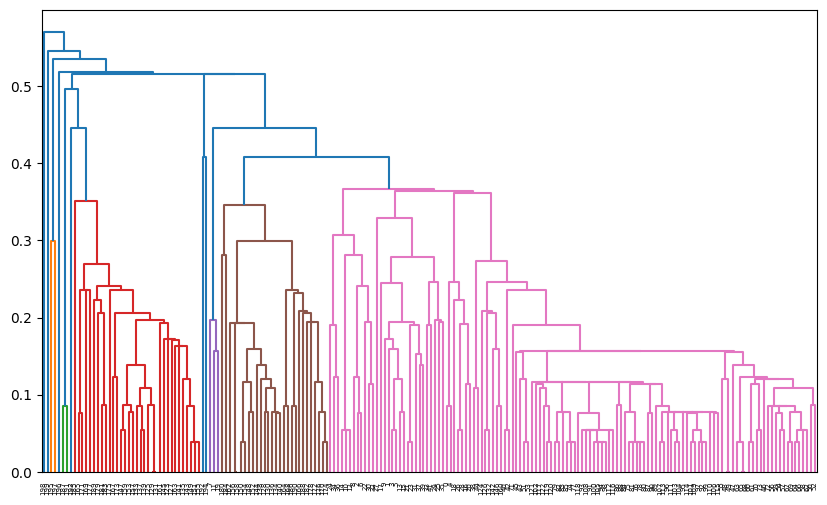

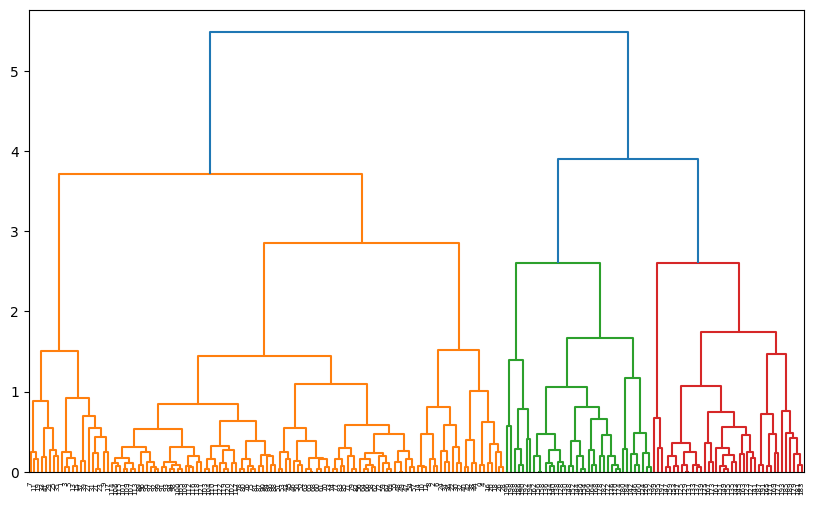

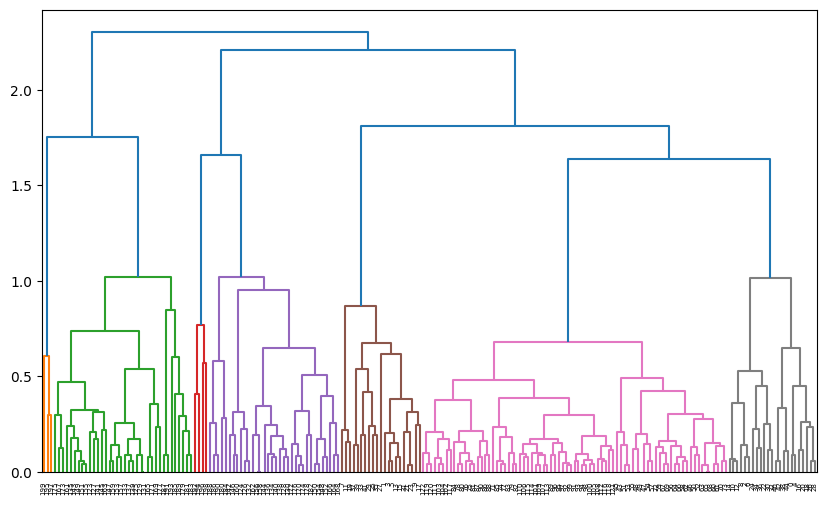

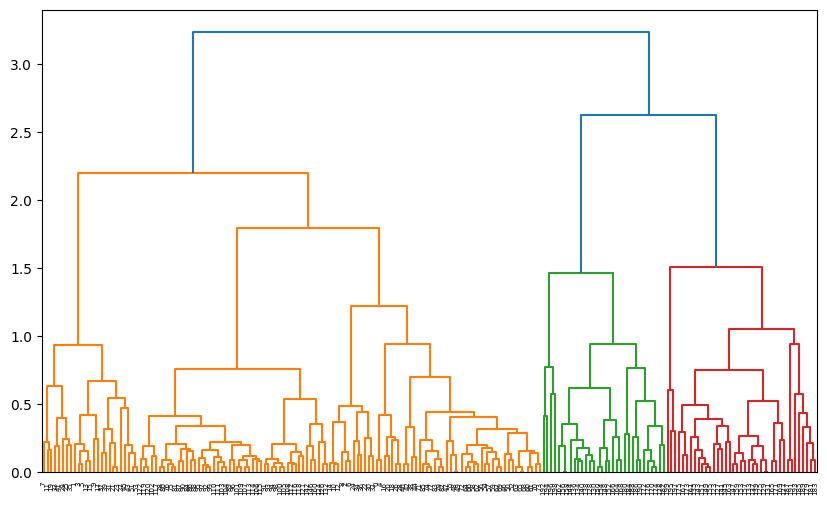

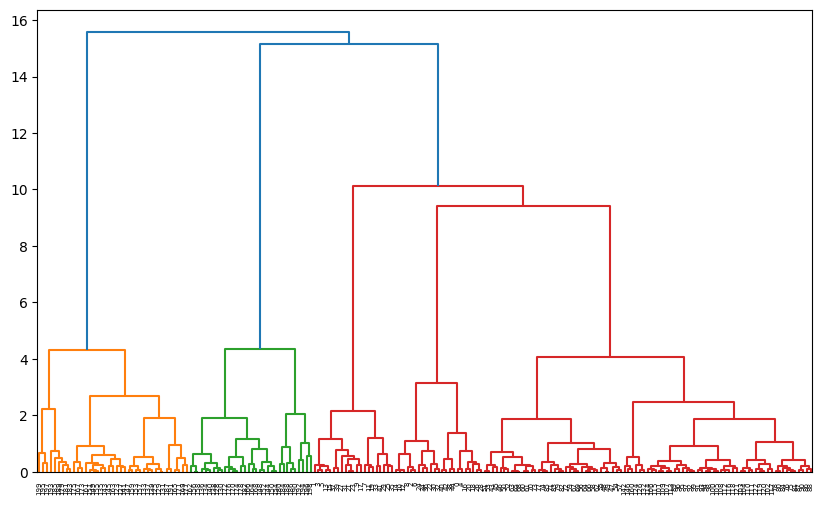

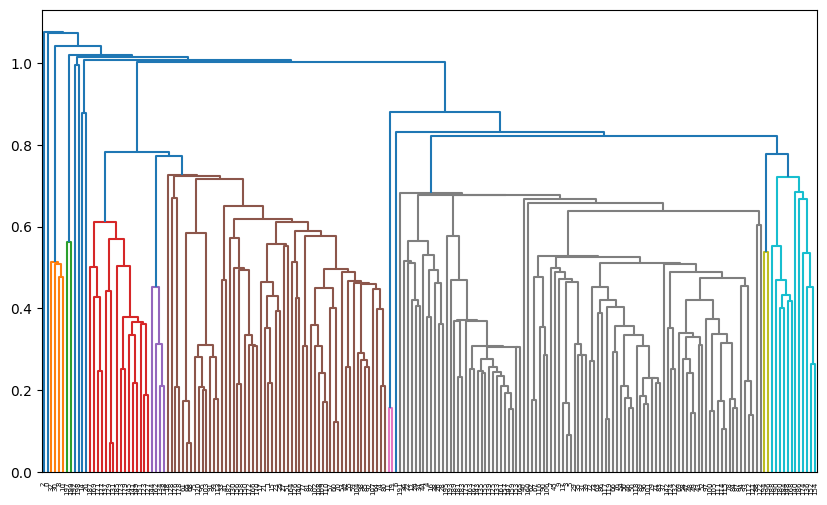

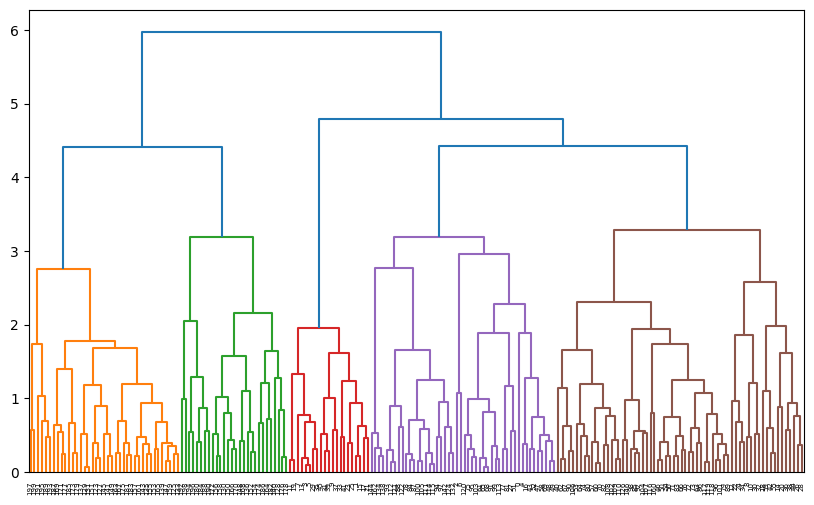

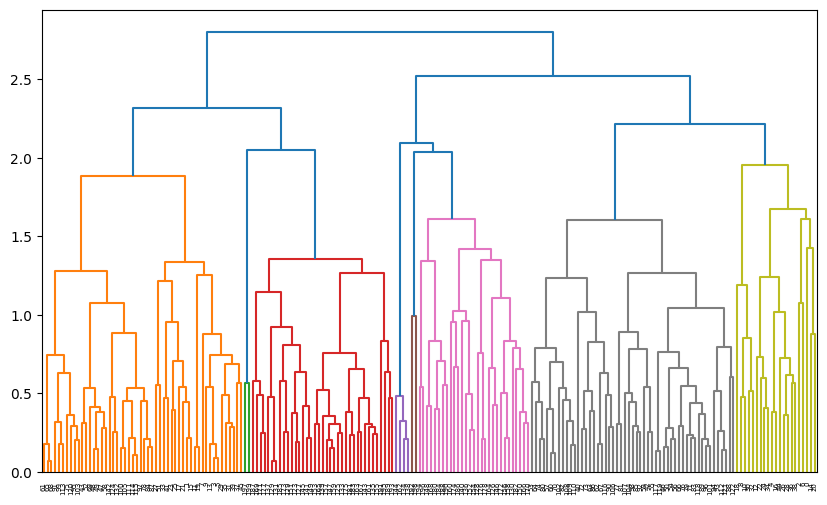

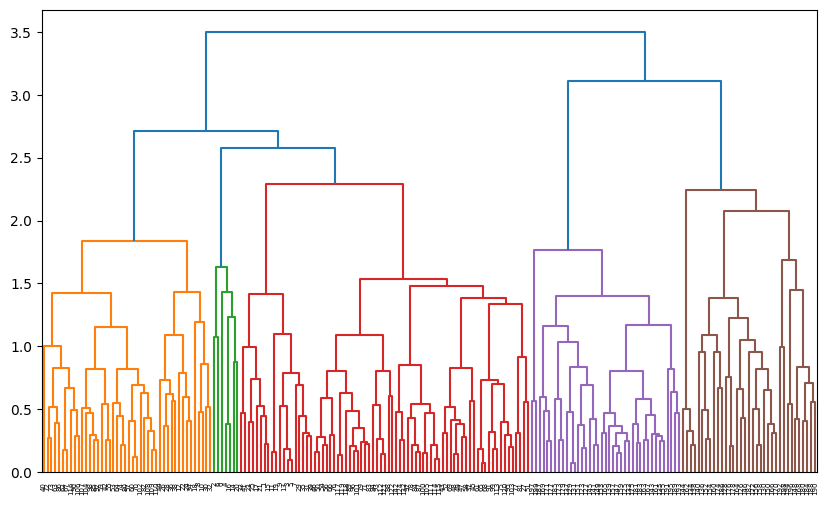

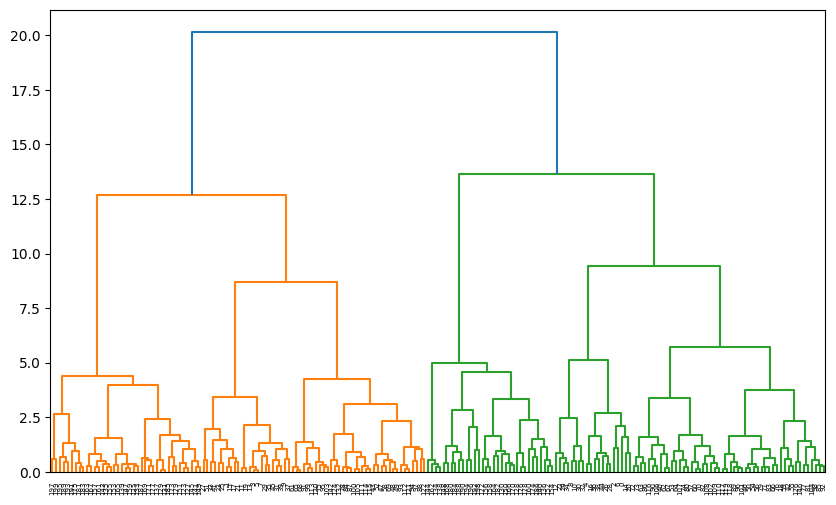

In [28]:
# Customer Dataset -- 200 x 4
path = '3/SMAI-Dataset-hc-dataset/new_customers.csv'
customer_data = pd.read_csv(path)
customer_data = customer_data.drop(customer_data.columns[0], axis=1)
customer_data['Genre'].replace('Female', 0, inplace=True)
customer_data['Genre'].replace('Male', 1, inplace=True)
columns = list(customer_data)
for i in columns:
    if i=='Age' or i=='Annual Income (k$)' or i=='Spending Score (1-100)':
        mean = customer_data[i].mean()
        std = customer_data[i].std()
        customer_data[i] = (customer_data[i]-mean) / std

linkage_types = ['single', 'complete', 'average', 'weighted', 'ward']

datasets = []
df = customer_data
datasets.append(df[['Genre', 'Annual Income (k$)', 'Spending Score (1-100)']])
datasets.append(df[['Genre', 'Age', 'Spending Score (1-100)']])
datasets.append(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
datasets.append(df[['Annual Income (k$)', 'Spending Score (1-100)']])
datasets.append(df)

model = HC()
for dataset in datasets:
    dataset = dataset.to_numpy()
    for link in linkage_types:
        model.dendrogram(model.linkages(dataset, link))

- Dropped the first column as it corresponds to id and does not add any value to the data.
- Applied Standardization on the the columns of the dataset.
- Used all the linkage metrics i.e, single, complete, average, weighted and ward.
- Used some subset of the columns and the entire dataset as the different features.
- Obtained the linkage matrices and plotted the dendrogram for each of the combinations.

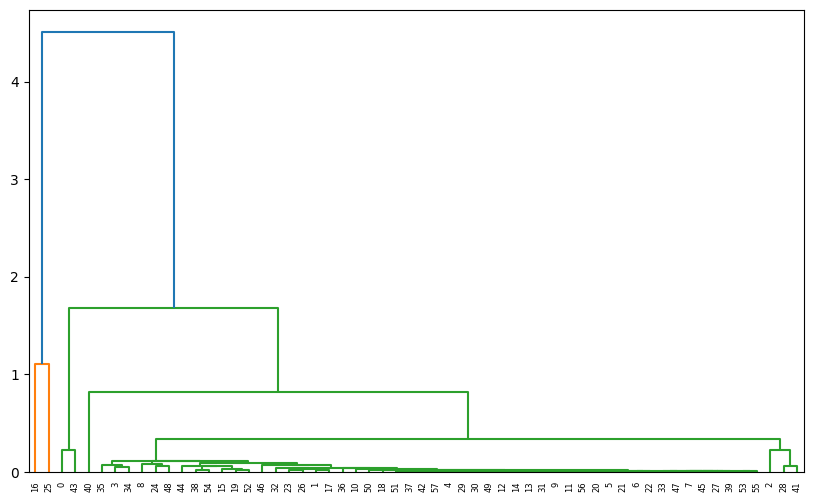

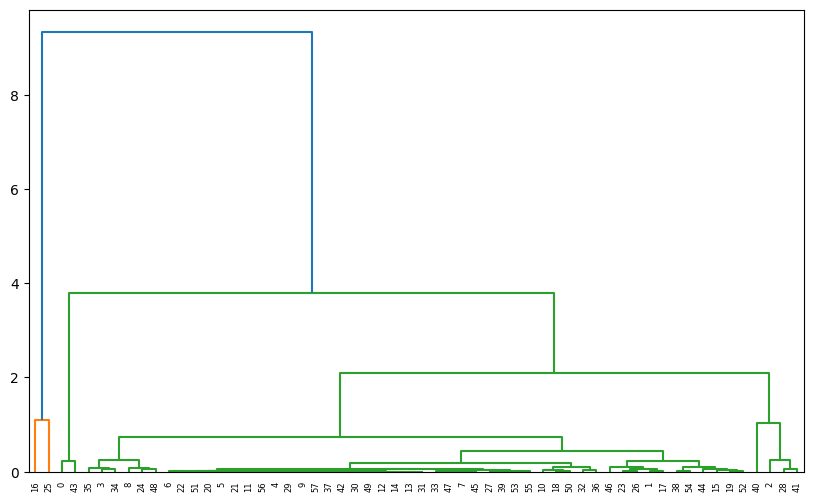

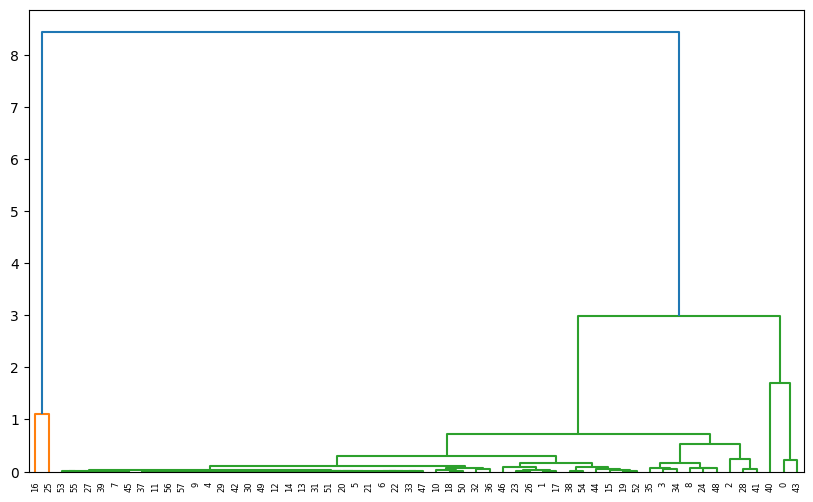

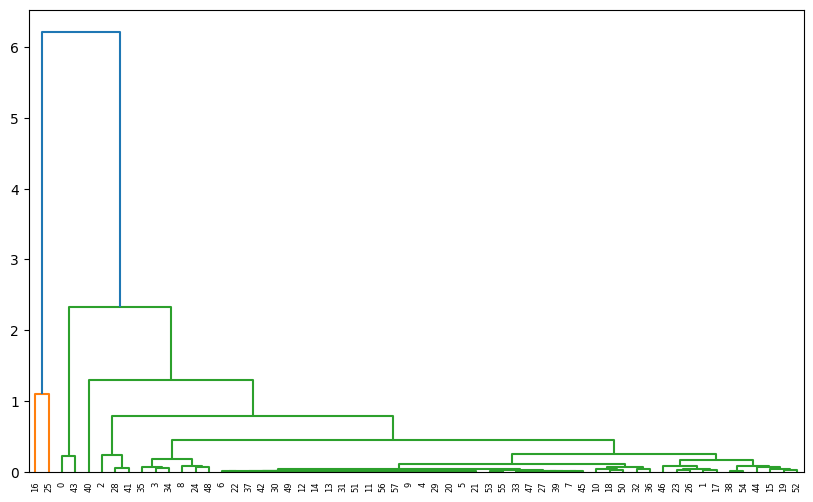

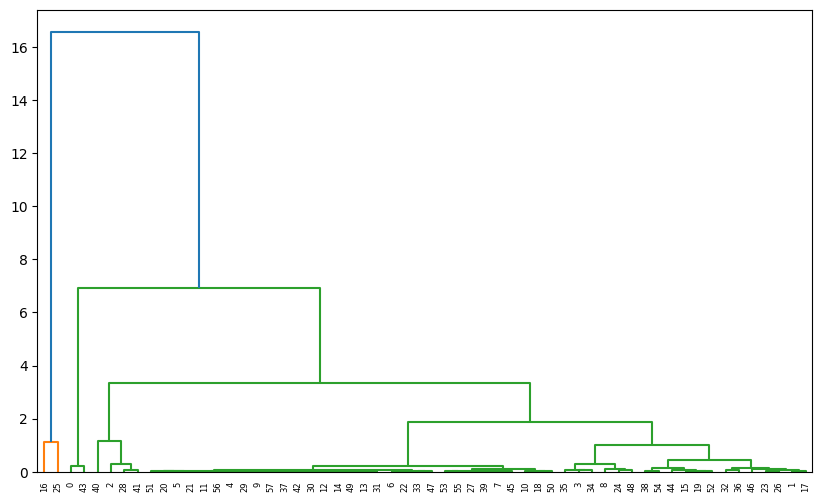

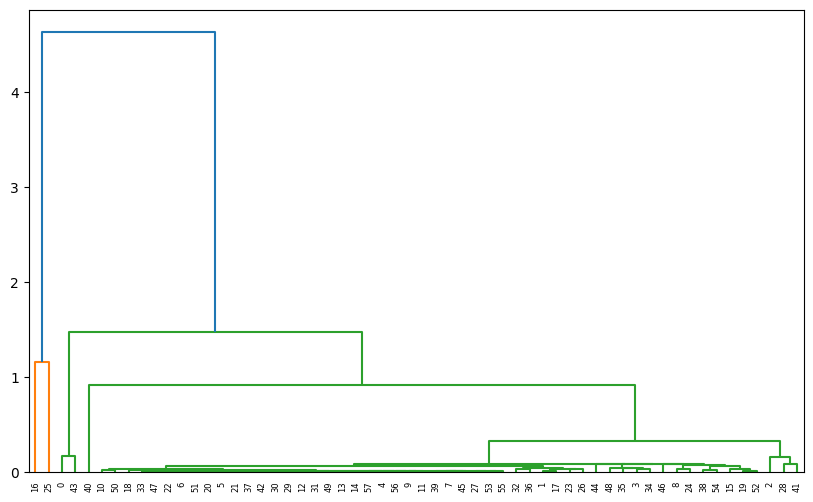

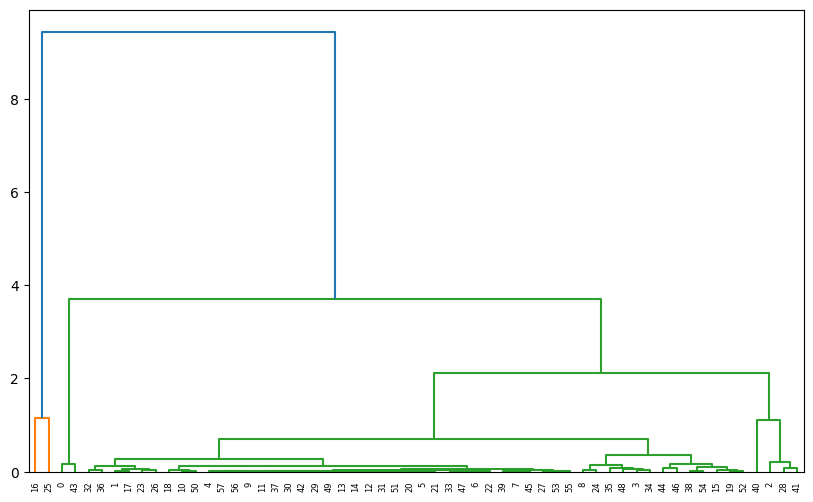

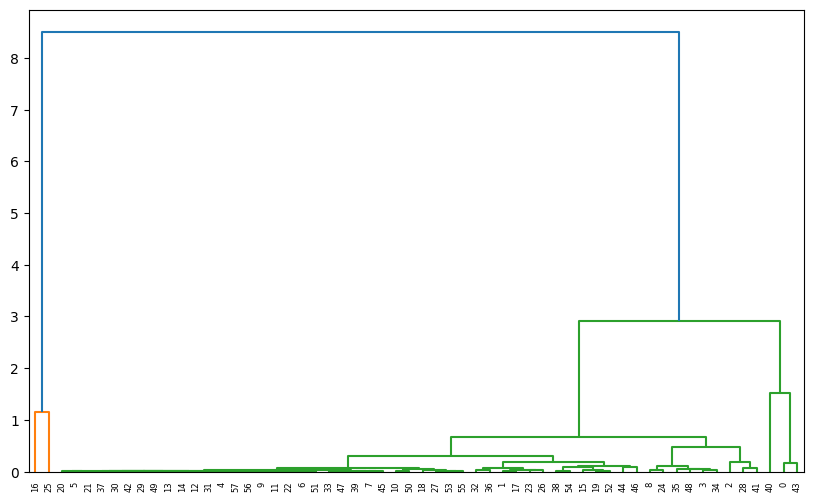

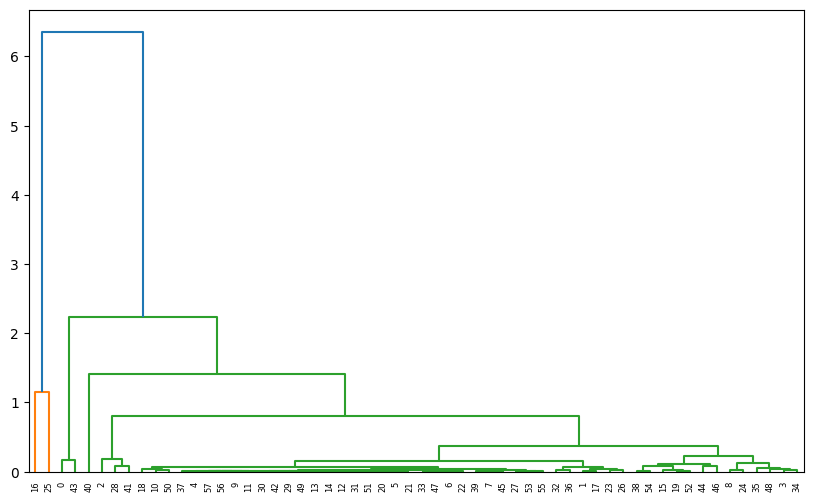

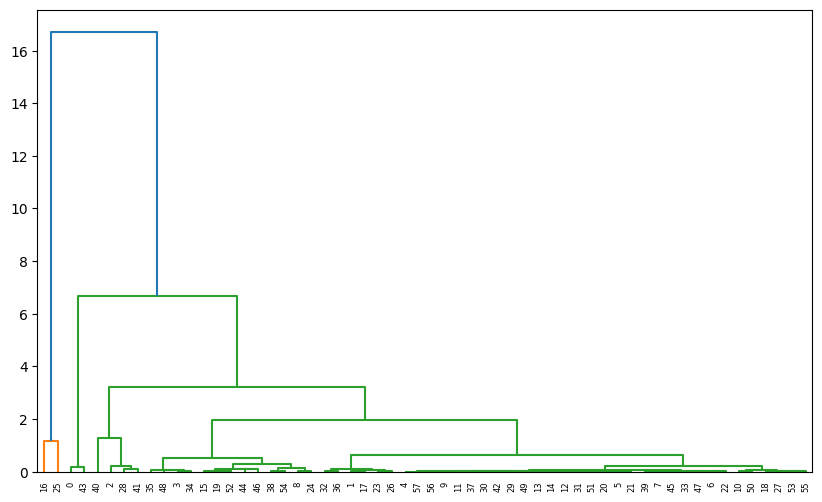

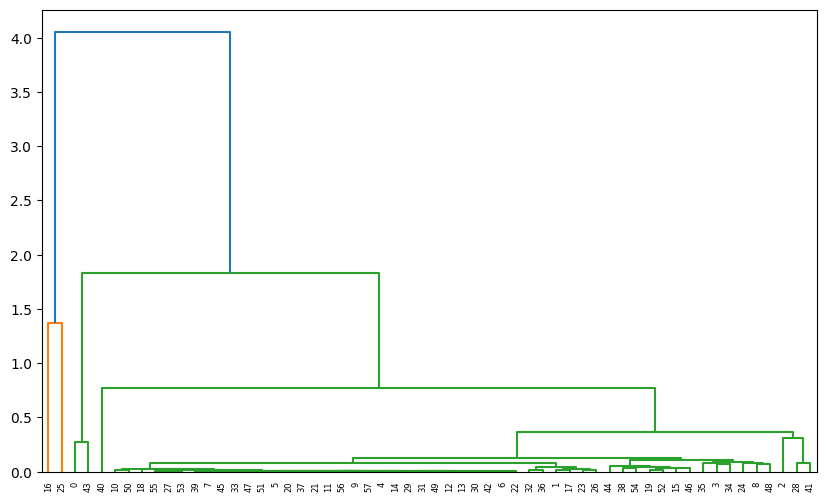

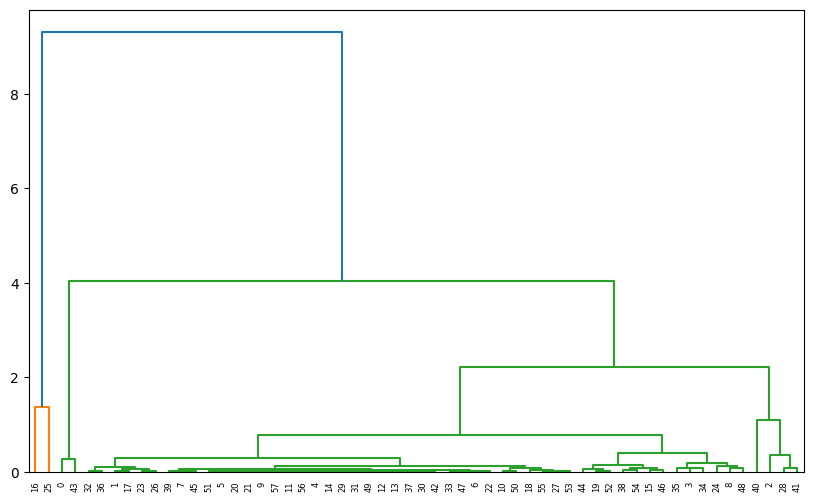

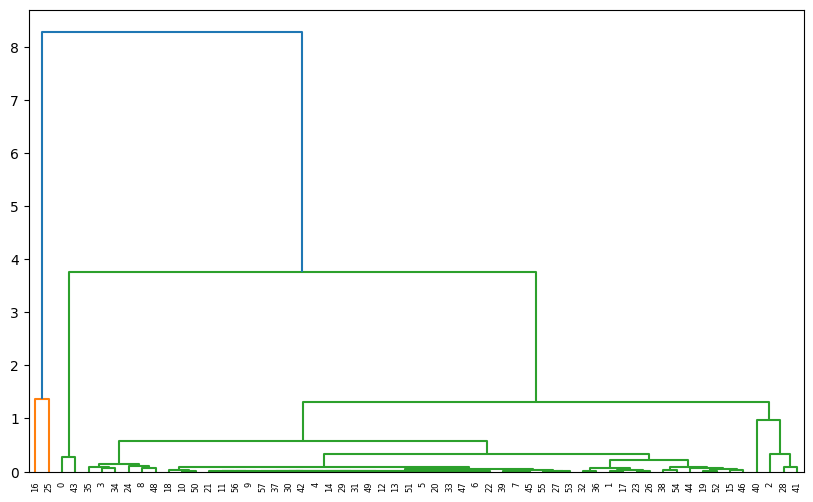

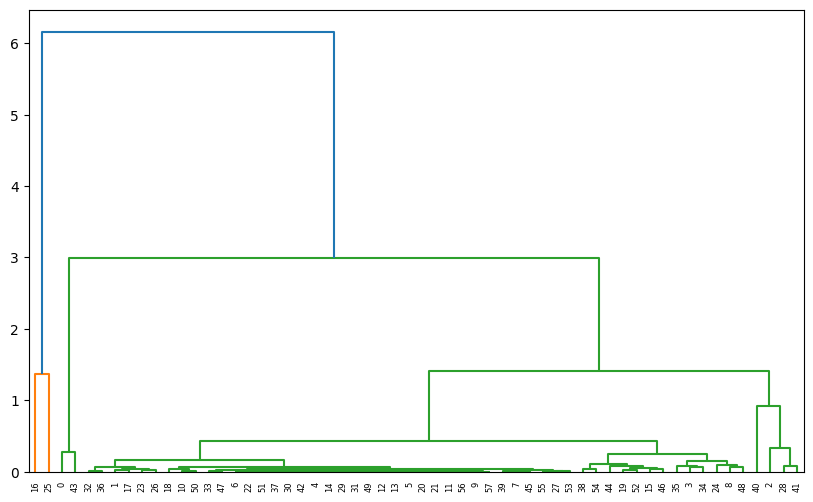

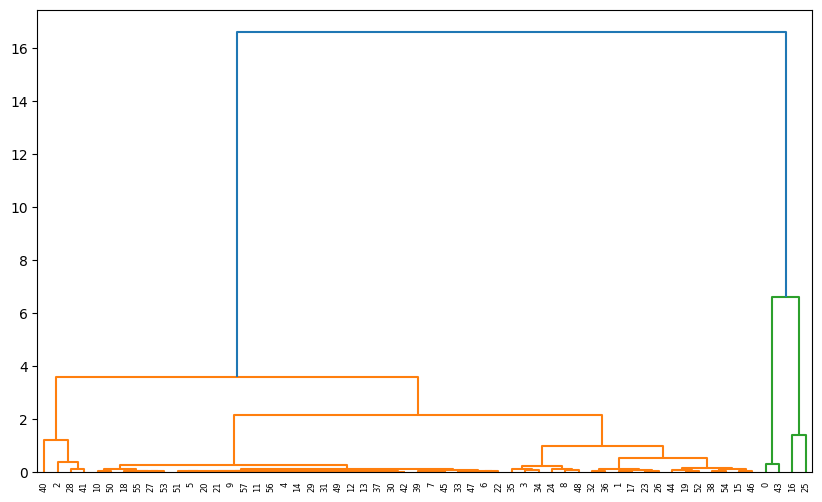

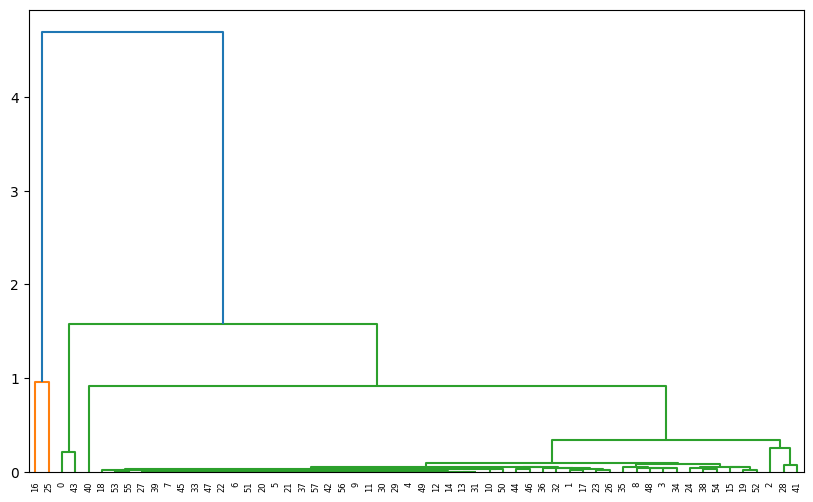

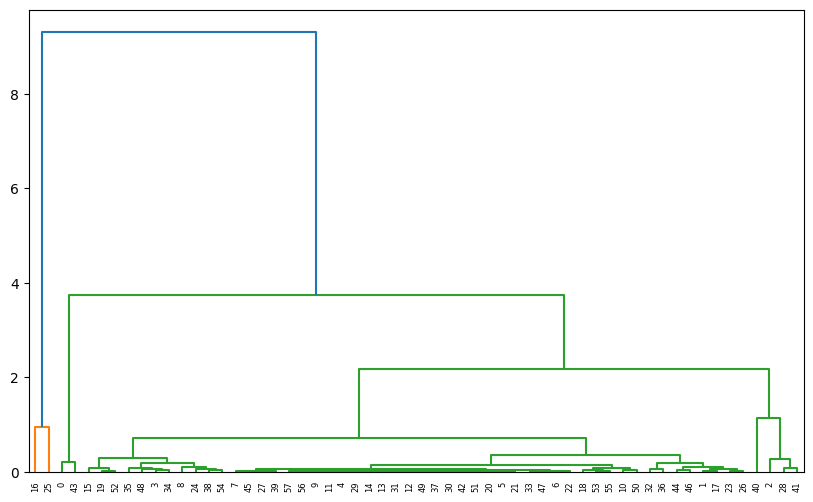

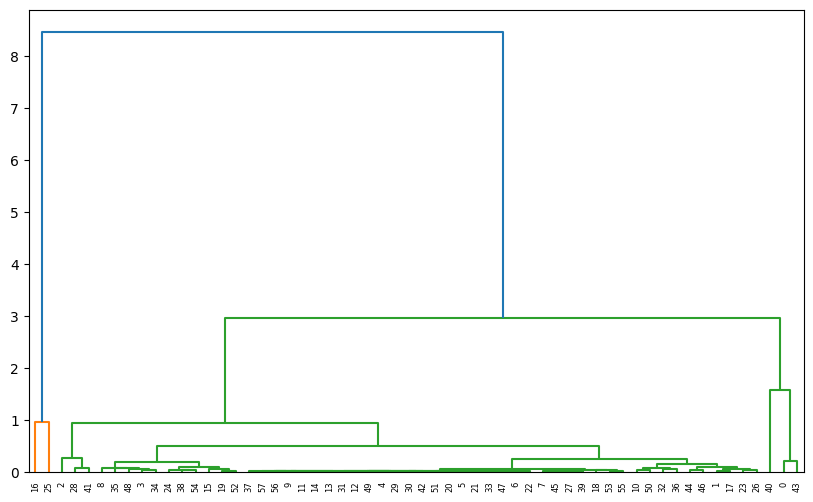

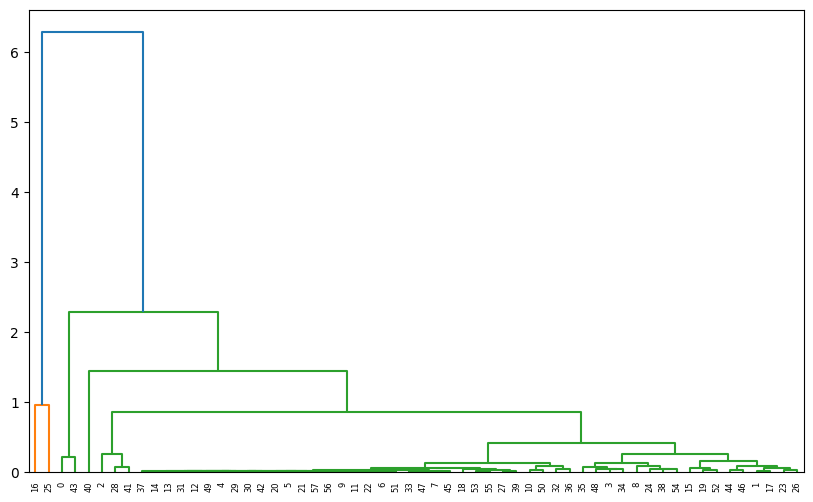

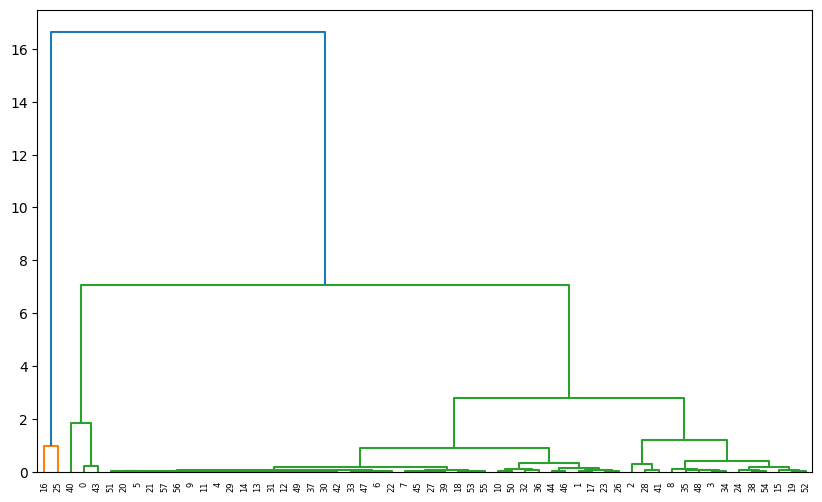

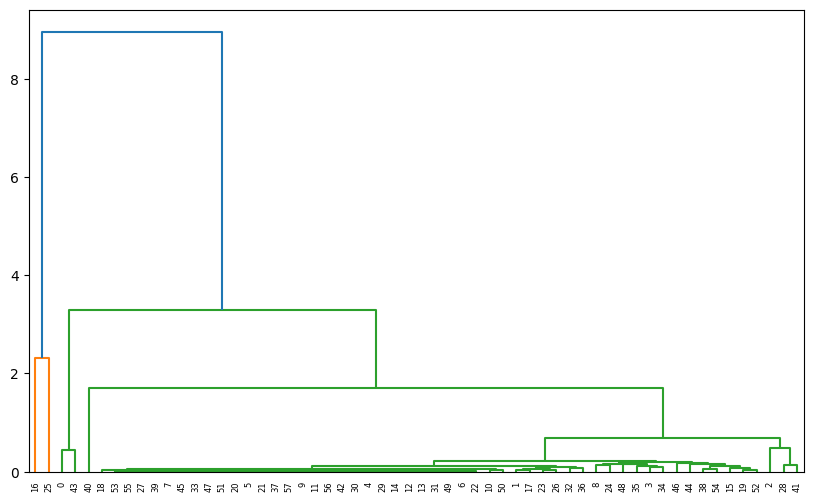

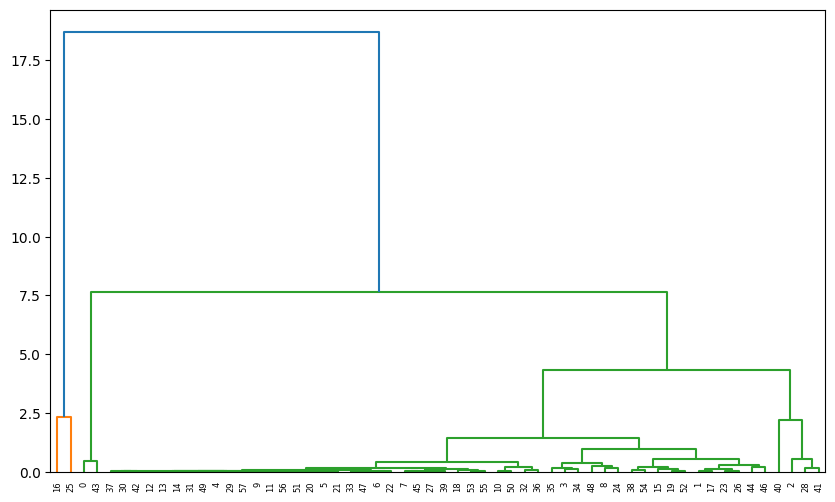

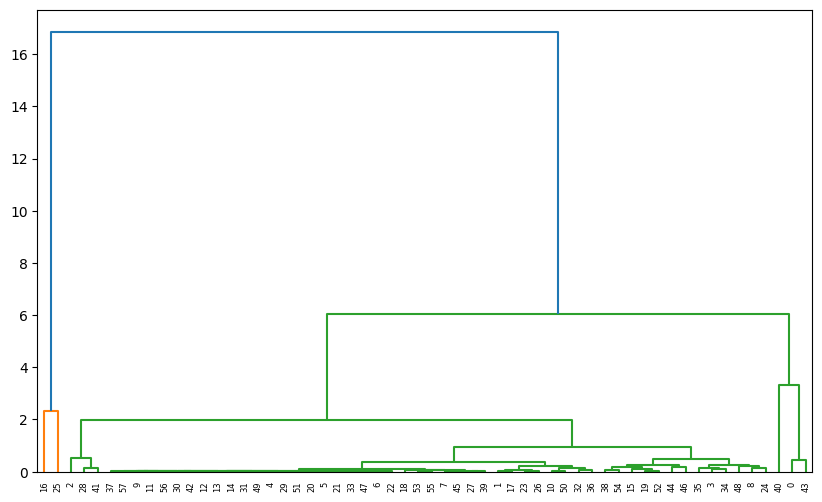

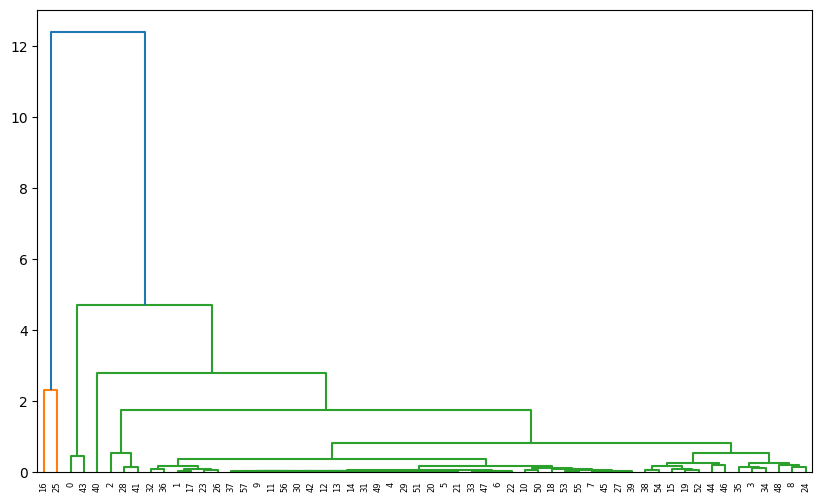

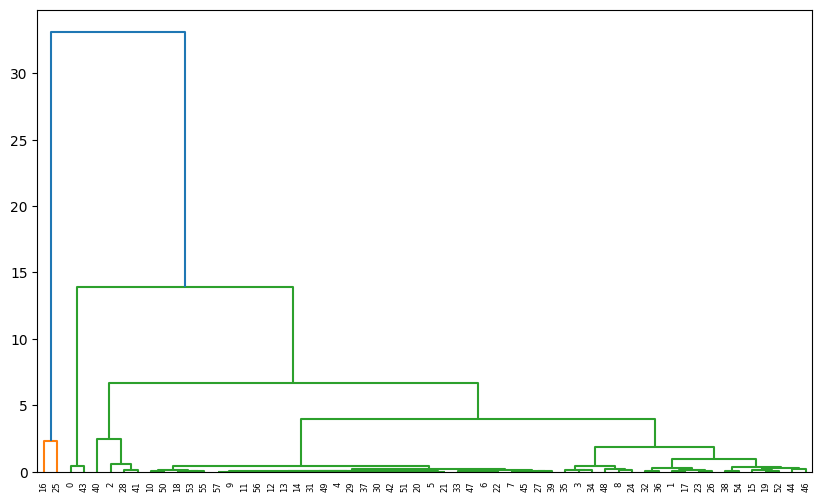

In [29]:
# Gene Dataset -- 58 x 13
path = '3/SMAI-Dataset-gene-expression/gene.csv'
gene_data = pd.read_csv(path)
gene_data = gene_data.drop(gene_data.columns[0], axis=1)
columns = list(gene_data)
for i in columns:
    mean = gene_data[i].mean()
    std = gene_data[i].std()
    gene_data[i] = (gene_data[i]-mean) / std

linkage_types = ['single', 'complete', 'average', 'weighted', 'ward']

datasets = []
df = gene_data
datasets.append(df[['GSM613412', 'GSM613413', 'GSM613414']])
datasets.append(df[['GSM613415', 'GSM613416', 'GSM613417']])
datasets.append(df[['GSM613418', 'GSM613419', 'GSM613420']])
datasets.append(df[['GSM613421', 'GSM613422', 'GSM613423']])
datasets.append(df)

model = HC()
for dataset in datasets:
    dataset = dataset.to_numpy()
    for link in linkage_types:
        model.dendrogram(model.linkages(dataset, link))